In [6]:
import numpy as np
import pandas

dataset = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/traindata.csv', ',')
y_true = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/trainlabel.csv', ',')

X = dataset
y = y_true['y']

from sklearn import preprocessing
scalerX = preprocessing.StandardScaler().fit(X)
X = scalerX.transform(X)  

Automatically created module for IPython interactive environment
0.878884278229
0.900002487558
0.907143803407
0.913973596019
0.918945530003
0.922672238796
0.920497939666
0.922048613823
0.92298000177
0.927018812301


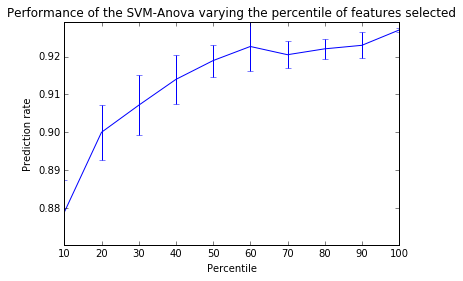

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

n_samples = len(y)


transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(kernel='rbf', C=5.0))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, y, n_jobs=1)
    print(this_scores.mean())
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

In [27]:
print(__doc__)

import pandas
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X_original = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/traindata.csv', ',')
X = X_original
y_true = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/trainlabel.csv', ',')
y = y_true['y']

scalerX = preprocessing.StandardScaler().fit(X)
X = scalerX.transform(X)     

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)



# build a classifier
clf = SVC(kernel='rbf')


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# use a full grid over all parameters
param_grid = {"C": [1, 2, 5, 7, 10, 100, 200, 400, 800]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs = -1)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
GridSearchCV took 0.74 seconds for 9 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.929 (std: 0.016)
Parameters: {'C': 5}

Model with rank: 2
Mean validation score: 0.928 (std: 0.011)
Parameters: {'C': 7}

Model with rank: 3
Mean validation score: 0.924 (std: 0.008)
Parameters: {'C': 2}



In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import numpy as np
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit

X_original = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/traindata.csv', ',')
X = X_original
y_true = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/trainlabel.csv', ',')
y = y_true['y']

scalerX = preprocessing.StandardScaler().fit(X)
X = scalerX.transform(X)     

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)

t0 = time()
clf = SVC(kernel='rbf', C=5)

scores_train = cross_val_score(clf, X_train, y_train, cv=5)
scores_test = cross_val_score(clf, X_test, y_test, cv=5)

print("done in %0.3fs" % (time() - t0))

print("Train set accuracy: %0.2f (+/- %0.2f)" % (scores_train.mean(), scores_train.std() * 2))
print("Validation set accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

done in 0.731s
Train set accuracy: 0.93 (+/- 0.05)
Validation set accuracy: 0.93 (+/- 0.03)


In [33]:
X_testdata = pandas.read_csv('/Users/ceric/Downloads/deeplearning/project1/testdata.csv', ',')
X_testdata = scalerX.transform(X_testdata) 
y_prediction = clf.fit(X_train, y_train).predict(X_testdata)

df = pandas.DataFrame()
df['y'] = (y_prediction)
df.to_csv('/Users/ceric/Downloads/deeplearning/project1/predictions.csv')